In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# database
from sklearn.datasets import load_iris

%matplotlib inline

In [19]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
# df['class'] = df['class'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
# split the data table into data X and class labels Y
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
print(x.shape, y.shape)

(150, 4) (150,)


In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


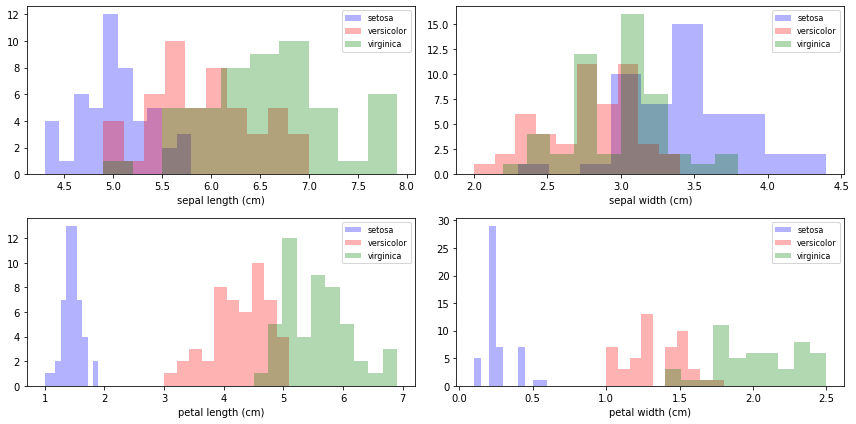

In [41]:
plt.figure(figsize=(12,6))
colors= ['blue', 'red', 'green']
for f in range(4):
    plt.subplot(2, 2, f+1)
    for label, color in zip(range(len(iris.target_names)), colors):
        plt.hist(x[y==label,f], label=iris.target_names[label], color=color, alpha=0.3)        
        plt.xlabel(iris.feature_names[f])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()                    


In [36]:
# Korak 1: Izračunavanje d-dimenzionalnog vektora srednjih vrijednosti

mean_vectors = []
for c in range(0,3):
    mean_vectors.append(np.mean(x[y==c], axis=0))
    print('Vektor srednjih vrijednosti {0}: {1}'.format(c, mean_vectors[c]))

Vektor srednjih vrijednosti 0: [5.006 3.428 1.462 0.246]
Vektor srednjih vrijednosti 1: [5.936 2.77  4.26  1.326]
Vektor srednjih vrijednosti 2: [6.588 2.974 5.552 2.026]


In [37]:
# Korak 2: Izračunavanje kovarijacionih matrica

S_W = np.zeros((4,4))
for c,mv in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == c]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('Kovarijaciona matrica 𝐒_𝐖 unutar klasa (within-class):\n', S_W)

Kovarijaciona matrica 𝐒_𝐖 unutar klasa (within-class):
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [8]:
overall_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = x[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('Kovarijaciona matrica između klasa 𝐒_𝐁  (between classes):\n', S_B)

Kovarijaciona matrica između klasa 𝐒_𝐁  (between classes):
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


In [9]:
# Korak 3: Izračunavanje svojstvenih vektora i svojstvenih vrijednosti

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)
    print('\nSvojstveni vektor {0}: \n{1}'.format(i+1, eigvec_sc.real))
    print('Svojstvena vrijednost {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Svojstveni vektor 1: 
[[ 0.20874182]
 [ 0.38620369]
 [-0.55401172]
 [-0.7073504 ]]
Svojstvena vrijednost 1: 3.22e+01

Svojstveni vektor 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
Svojstvena vrijednost 2: 2.85e-01

Svojstveni vektor 3: 
[[ 0.88513899]
 [-0.29455053]
 [-0.27255052]
 [-0.23555291]]
Svojstvena vrijednost 3: 3.53e-15

Svojstveni vektor 4: 
[[-0.80593687]
 [ 0.40432808]
 [ 0.41273963]
 [-0.12895956]]
Svojstvena vrijednost 4: 3.17e-17


In [10]:
# Korak 4: Izbor lineranih diskriminanti za novi podprostor (podskup) svojstava

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)

print('Svojstvene vrijednosti (max->min):')
for i in eig_pairs:
    print(i[0])

[(32.19192919827803, array([ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ])), (0.28539104262306414, array([-0.00653196, -0.58661055,  0.25256154, -0.76945309])), (3.5296362660244315e-15, array([ 0.88513899, -0.29455053, -0.27255052, -0.23555291])), (3.17116800810927e-17, array([-0.80593687,  0.40432808,  0.41273963, -0.12895956]))]
Svojstvene vrijednosti (max->min):
32.19192919827803
0.28539104262306414
3.5296362660244315e-15
3.17116800810927e-17


In [11]:
print('Objašnjena varijansa')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('svojstvena vrijednost {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Objašnjena varijansa
svojstvena vrijednost 1: 99.12%
svojstvena vrijednost 2: 0.88%
svojstvena vrijednost 3: 0.00%
svojstvena vrijednost 4: 0.00%


In [12]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrica W:', W.real, sep='\n')

Matrica W:
[[ 0.20874182 -0.00653196]
 [ 0.38620369 -0.58661055]
 [-0.55401172  0.25256154]
 [-0.7073504  -0.76945309]]


In [13]:
# Korak 5: Transformacija uzoraka u novi prostor

Y = x.dot(W)
Y.shape
#print(Y)

(150, 2)

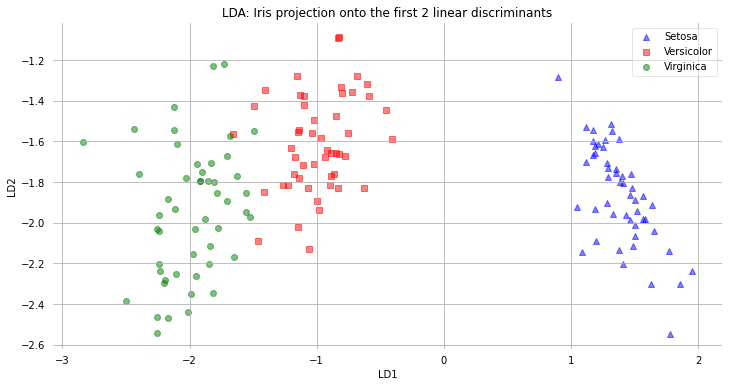

In [14]:
def plot_step_lda():
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    
    plt.figure(figsize=(12,6))
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=Y[:,0].real[y == label], y=Y[:,1].real[y == label], marker=marker, color=color, alpha=0.5, \
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()